# Лекция 11

In [15]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt

## Градиентный спуск - пакетный градиентный спуск. Для работы используются ВСЕ доступные обучающие данные.

## Стохастический градиентный спуск - на каждой интерации обучаемся только по одной выборке из данных.

### - сокращение числа вычислений
### - вносим смещение => боремся с переобучением

## Мини-пакетный градиентный спуск - на каждой итерации используется несколько выборок.

In [4]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28],
    ]
)
x = data[:, 0]
y = data[:, 1]

n = len(x)

w_1 = 0
w_0 = 0

L = 0.001
#размер выборки
sample_size = 1
iterations = 100000
for i in range(iterations):
    idx = np.random.choice(n, sample_size, replace=False)
    D_w0 = 2 * sum(-y[idx] + w_0 + w_1 * x[idx])
    D_w1 = 2 * sum(x[idx] * (-y[idx] + w_0 + w_1 * x[idx]))
    w_1 -= L * D_w1
    w_0 -= L * D_w0
print(w_1, w_0)

2.3318399725274483 0.755586365914124


## Как оценить, насколько сильно "промахиваются" прогнозы при использовании линейной регрессии.

In [ ]:
data_df = pd.DataFrame(data)
print(data_df.corr(method='pearson'))

         0        1
0  1.00000  0.97684
1  0.97684  1.00000


In [6]:
data_df[1] = data_df[1].values[::-1]
print(data_df.corr(method='pearson'))

         0        1
0  1.00000 -0.97684
1 -0.97684  1.00000


## Коэффициент корреляции помогает понять, есть ли связь между двумя переменными.

## Обучающие и тестовые выборки
### Основной метод борьбы с переобучением, заключается в том, что набор данных делится на обучающую и тестовую выборки.
### Во всех видах машинного обучения с учителем это встречается.
### Обычная пропорция 2/3 на обучение, 1/3 на тест (4/5 к 1/5. 9/10 к 1/10).

In [12]:
data_df = pd.DataFrame(data)
X = data_df.values[:, :-1]
Y = data_df.values[:, -1]

print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[ 5  7  7 10 11 14 17 19 22 28]


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[ 6]
 [ 3]
 [10]
 [ 2]
 [ 1]
 [ 9]]
[14  7 28  7  5 22]
[[7]
 [5]
 [8]
 [4]]
[17 11 19 10]


In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)
r = model.score(X_test, Y_test)
print(r)

0.801273003018479


In [19]:
kfold = KFold(n_splits=3, random_state=1, shuffle=True) # 3-кратная перекрёстная валидация
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean(), results.std())

[ 0.88414769 -2.35154626  0.75792214]
-0.23649214168138835 1.4964566263570558


### Метрики показывают, насколько ЕДИНООБРАЗНО ведёт себя модель на разных выборках.

### Возможно использование поэлементной перекрёстной валидации - мало данных.

### Случайная валидация

### Валидационная выборка - для сравнения различных моделей или конфигураций

In [20]:
data_df = pd.read_csv('data/multiple_independent_variable_linear.csv')
print(data_df.head())

   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77


In [22]:
X = data_df.values[:, :-1]
Y = data_df.values[:,-1]
model = LinearRegression().fit(X, Y)

print(model.coef_, model.intercept_)

[2.00672647 3.00203798] 20.109432820035977


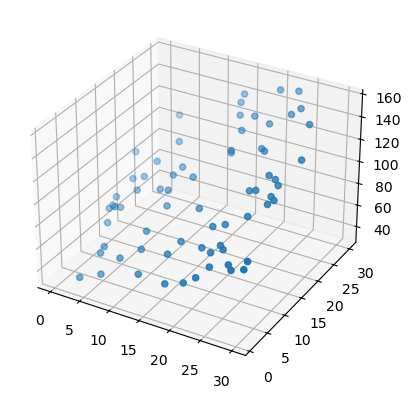

In [26]:
x1 = X[:, 0]
x2 = X[:, 1]
y = Y


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y)

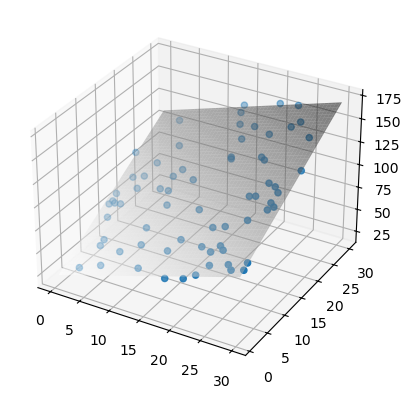

In [32]:
x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)
X1_, X2_ = np.meshgrid(x1_, x2_)
Y_ = model.intercept_ + model.coef_[0] * X1_ + model.coef_[1] * X2_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y)
ax.plot_surface(X1_, X2_, Y_, cmap='Greys', alpha=0.5)